In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv ("games.csv")

In [ ]:
df.info()
print()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Se realizaran la transformacion de los datos de mayusculas a minisculas

In [ ]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Se realizara la validacion de los valores nulos y se remplazaran por "unknow" para poder analizar datos mas presisos y garantes asi mismo se realizara la validacion de los valores ausentes en las columnas de calificacion y se remplazar por "unknow" para poder generar los reportes numericos sin problemas.

adicional se puede evidenciar que hay juegos que no han sido valorados por los compradores

<!-- Al darnos cuenta en las validaciones de los valores ausentes podemos determinar que hay juegos que no han sido valorados aun por sus compradores -->

In [ ]:
df["year_of_release"] = df["year_of_release"].fillna(0)
df["genre"] = df["genre"].fillna("unknow")
df["name"] = df["name"].fillna("unknow")
df["critic_score"] = df["critic_score"].fillna("NaN")
df["user_score"] = df["user_score"].replace("tbd", "NaN")
df["user_score"] = df["user_score"].fillna("NaN")
df["rating"] = df["rating"].fillna("unknow")
print(df.isna().sum())
print()
df.head()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow


Se realiza el cambio de typo de dato float a dato int (numero entero) en la columna "year_of_release"

In [ ]:
df["year_of_release"] = df["year_of_release"].astype("int")
df["critic_score"] = df["critic_score"].replace("unknow", "nan").astype(float)
df["user_score"] = df["user_score"].replace("unknow", "nan").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Chequeo de duplicados

In [ ]:
print(f'El total de filas duplicadas es de {df.duplicated().sum()}')

El total de filas duplicadas es de 0


In [ ]:
na = df["na_sales"]
eu = df["eu_sales"]
jp = df["jp_sales"]

df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]
print("Se realiza la creacion de una columna nueva llamada 'total_sales' la cual contiene la suma de las ventas de las tres columnas de ventas")

df.head()

Se realiza la creacion de una columna nueva llamada 'total_sales' la cual contiene la suma de las ventas de las tres columnas de ventas


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow,31.38


como podemos observar, nos encontramos con una grafica que nos muestra claramente que en los años 2007 al 2011 han sido los mas productivos, y han venido una tendencia a la baja con la generacion de nuevos videojuegos esto se puede deber a menos inversion en la misma


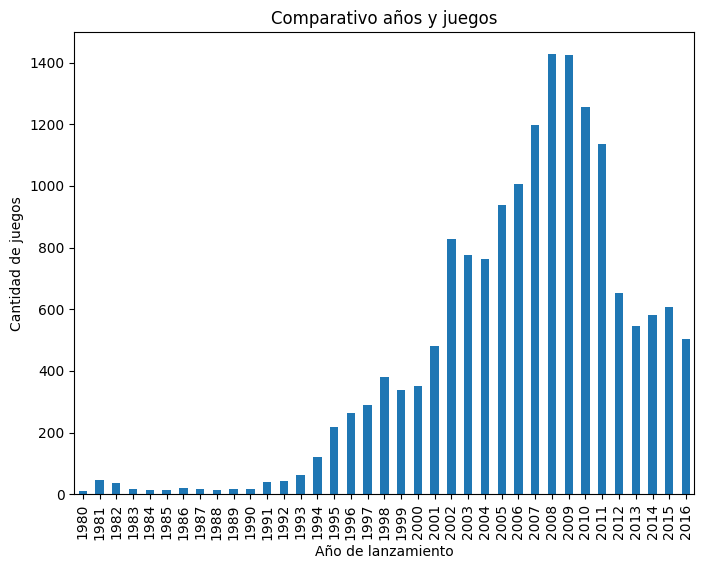

In [ ]:

print("como podemos observar, nos encontramos con una grafica que nos muestra claramente que en los años 2007 al 2011 han sido los mas productivos, y han venido una tendencia a la baja con la generacion de nuevos videojuegos esto se puede deber a menos inversion en la misma")

Comparativa_de_plataformas = df.groupby(by=["year_of_release"])[
    "name"].count().reset_index().query("year_of_release > 0")
Comparativa_de_plataformas.plot(kind = "bar",
                                  x = "year_of_release",
                                  y = "name",
                                  title = "Comparativo años y juegos",
                                  ylabel = "Cantidad de juegos",
                                  xlabel = "Año de lanzamiento",
                                  legend = False,
                                  figsize = [8, 6],
                                  )

plt.show()

Como podemos observar existen 6 plataformas que han generado mas ventas de juegos hasta la fecha de generacion de la base de datos


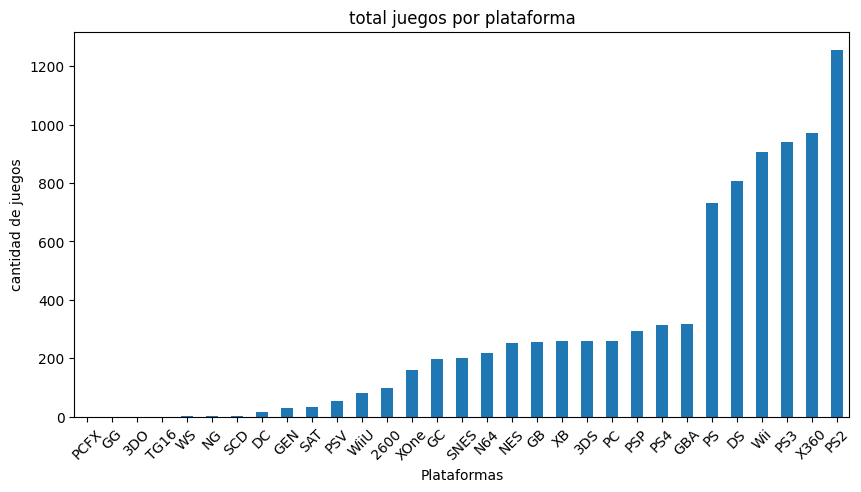

In [ ]:
print("Como podemos observar existen 6 plataformas que han generado mas ventas de juegos hasta la fecha de generacion de la base de datos")

ventas_por_plataforma = df.groupby("platform")["total_sales"].sum().sort_values()

ventas_por_plataforma.plot(title = "total juegos por plataforma",
                          kind = "bar",
                          x = "platform",   
                          y = "name",
                          xlabel = "Plataformas",
                          ylabel = "cantidad de juegos",
                          figsize=[10, 5],
                          rot=45,
                          )
plt.show()

En este apartado mostramos la distribucion entre las cantidad de ventas totales y su frecuencia  de las mismas
validamos la cantidad de ventas por plataforma


<function matplotlib.pyplot.show(close=None, block=None)>

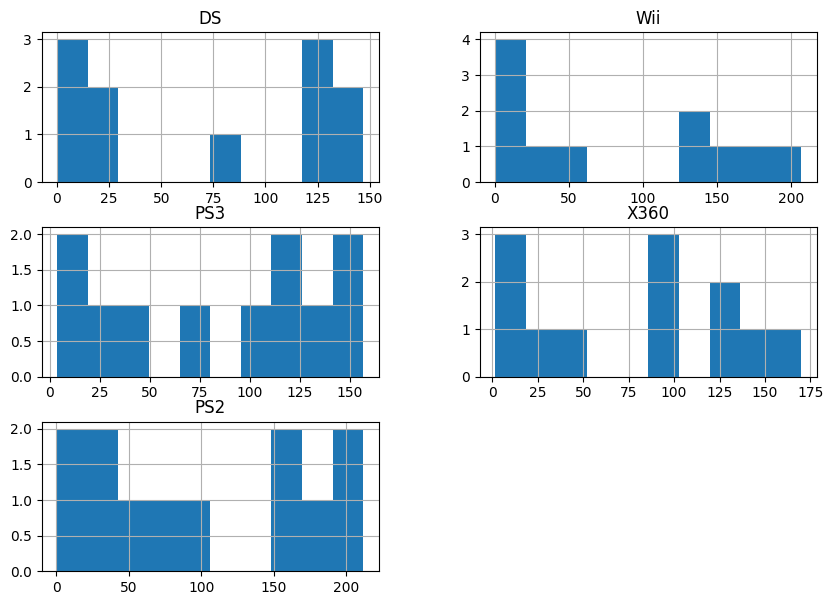

In [ ]:
filtro_por_platafoma = df.pivot_table(
    index= "year_of_release",
    columns= "platform",
    values="total_sales",
    aggfunc="sum").query("year_of_release > 0")

print("En este apartado mostramos la distribucion entre las cantidad de ventas totales y su frecuencia  de las mismas")

ventas_por_plataforma_5= filtro_por_platafoma.loc[:,
                                                ["DS",
                                                "Wii",
                                                "PS3",
                                                "X360",
                                                "PS2"]]
print("validamos la cantidad de ventas por plataforma")
ventas_por_plataforma_5.hist(figsize=[10,7])
plt.show

vamos a evidenciar la linea de vida de cada plataforma al pasar de los años

Como podemos observar evidenciamos que 


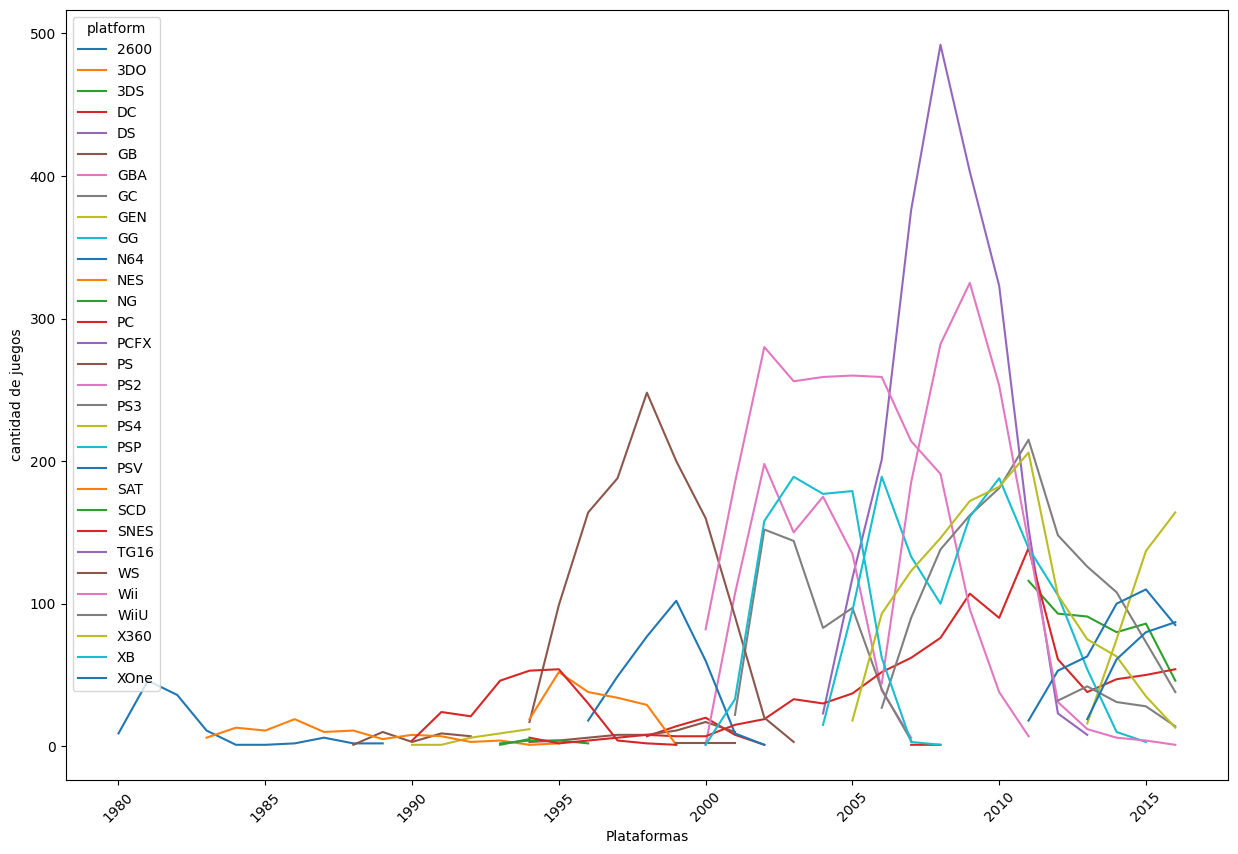

In [ ]:

tabla_JUEGOS_por_año = df.groupby(["year_of_release", "platform"])[
    "name"].count().reset_index().query("year_of_release > 0")

tiempo_de_vida = pd.pivot_table(
    tabla_JUEGOS_por_año, index="year_of_release", columns="platform", values="name", aggfunc="sum")

tiempo_de_vida.plot.line(figsize=[15,10],
                         xlabel="Plataformas",
                         ylabel="cantidad de juegos",
                         rot=45,)

print("vamos a evidenciar la linea de vida de cada plataforma al pasar de los años")
print()
print("Como podemos observar evidenciamos que apartir del año 2000 vemos un auge en la creacion de juegos ")

basados en los datos de los analisis anteriores podemos determinar que los datos de alto valor para realizar analisis seran desde el año 2000 ya que vemos una alta produccion de juegos.

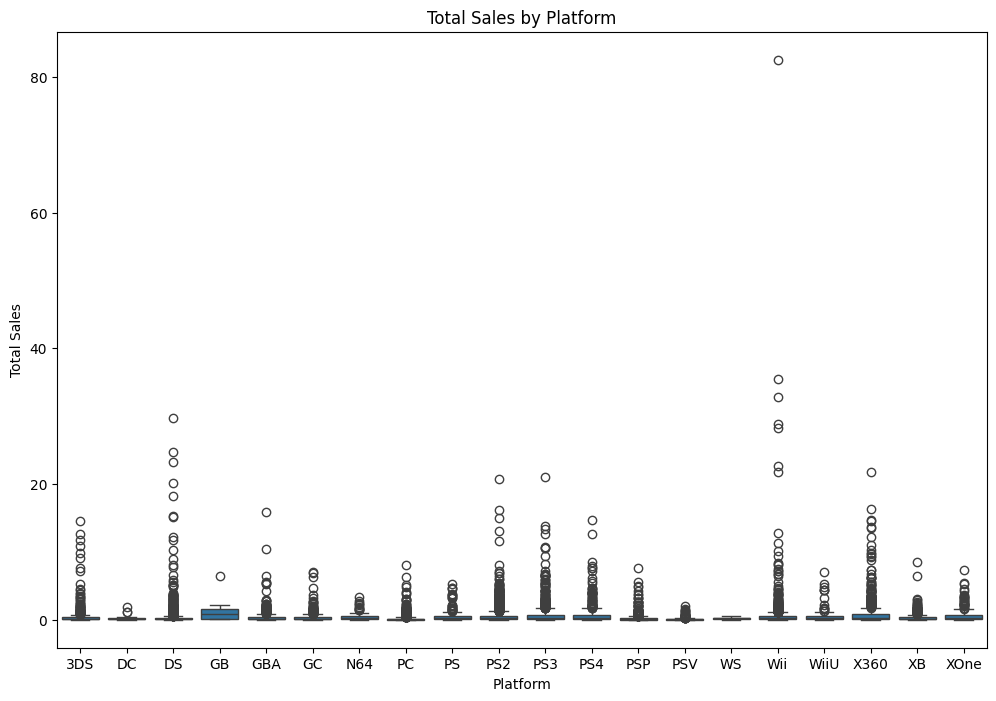

In [ ]:
Datos_relevantes = df.query("year_of_release >= 2000")
Datos_relevantes_graph = Datos_relevantes.pivot_table(index="platform",columns= "name", values="total_sales",aggfunc="sum").reset_index()
Datos_relevantes_graph_melted = Datos_relevantes_graph.melt(
    id_vars="platform", var_name="name", value_name="total_sales")

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=Datos_relevantes_graph_melted)

# Add title and labels
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

# Datos_relevantes_graph.head()

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title('Boxplot de Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

SyntaxError: invalid syntax (842801469.py, line 1)